In [24]:
import pandas as pd
import sklearn
import yfinance as yf
import statsmodels.tsa 
%matplotlib inline

In [25]:
stock_info = yf.download(tickers = 'aapl', period ="5y",interval="1d", auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [26]:
stock_info.index

DatetimeIndex(['2017-10-26 00:00:00-04:00', '2017-10-27 00:00:00-04:00',
               '2017-10-30 00:00:00-04:00', '2017-10-31 00:00:00-04:00',
               '2017-11-01 00:00:00-04:00', '2017-11-02 00:00:00-04:00',
               '2017-11-03 00:00:00-04:00', '2017-11-06 00:00:00-05:00',
               '2017-11-07 00:00:00-05:00', '2017-11-08 00:00:00-05:00',
               ...
               '2022-10-13 00:00:00-04:00', '2022-10-14 00:00:00-04:00',
               '2022-10-17 00:00:00-04:00', '2022-10-18 00:00:00-04:00',
               '2022-10-19 00:00:00-04:00', '2022-10-20 00:00:00-04:00',
               '2022-10-21 00:00:00-04:00', '2022-10-24 00:00:00-04:00',
               '2022-10-25 00:00:00-04:00', '2022-10-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1259, freq=None)

In [27]:
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-10-26 00:00:00-04:00 to 2022-10-26 00:00:00-04:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [28]:
stock_info.drop(columns=["High","Low","Open","Volume"], inplace=True)

In [29]:
stock_info.head()

,Close
Date,
2017-10-26 00:00:00-04:00,37.348106
2017-10-27 00:00:00-04:00,38.686283
2017-10-30 00:00:00-04:00,39.557049
2017-10-31 00:00:00-04:00,40.107494
2017-11-01 00:00:00-04:00,39.597378


In [52]:
stock_info = stock_info.asfreq("b")
stock_info = stock_info.fillna(method='ffill')
stock_info= stock_info.iloc[1:]

DatetimeIndex(['2017-10-26 00:00:00-04:00', '2017-10-27 00:00:00-04:00',
               '2017-10-30 00:00:00-04:00', '2017-10-31 00:00:00-04:00',
               '2017-11-01 00:00:00-04:00', '2017-11-02 00:00:00-04:00',
               '2017-11-03 00:00:00-04:00', '2017-11-06 00:00:00-05:00',
               '2017-11-07 00:00:00-05:00', '2017-11-08 00:00:00-05:00',
               ...
               '2022-10-13 00:00:00-04:00', '2022-10-14 00:00:00-04:00',
               '2022-10-17 00:00:00-04:00', '2022-10-18 00:00:00-04:00',
               '2022-10-19 00:00:00-04:00', '2022-10-20 00:00:00-04:00',
               '2022-10-21 00:00:00-04:00', '2022-10-24 00:00:00-04:00',
               '2022-10-25 00:00:00-04:00', '2022-10-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1305, freq='B')

<AxesSubplot: xlabel='Date'>

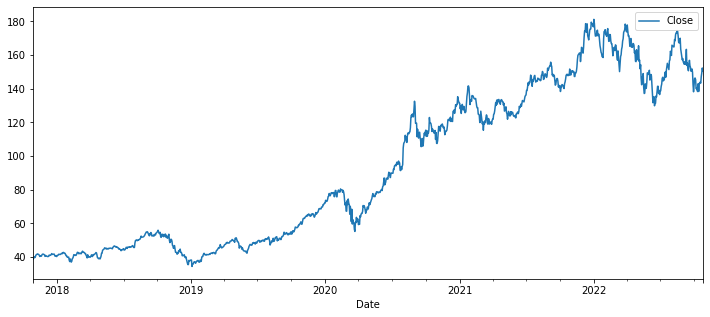

In [53]:
stock_info.plot(figsize = (12,5))

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
results = seasonal_decompose(stock_info, model = "multiplicative")
results.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None